# Proyecto Final 
## Analisis Exploratorio (Parte 1)
- Author: Lizette G. (GitHub: LizzyGamboa) (mail: lizzygamboap@gmail.com)
- Creation date: 14 July 2020

Se analizan los datos  de peliculas para una empresa de alquiler, la cual quiere saber información general de su almacén y cuál es el comportamiento de sus clientes respecto a su oferta de películas. El cliente ha compartido una base de datos que contiene información de las siguientes variables: 

* budget
* company
* country
* director
* genre
* gross
* name
* rating
* released
* runtime
* score
* star
* votes
* writer
* year

A continuacion, la primera parte del análisis explorario para la empresa: 

In [23]:
library(tidyr)
library(dplyr )
library(tibble)
library(ggplot2)

options(warn=-1)

normalit<-function(m){
   (m - min(m))/(max(m)-min(m))
 }

In [21]:
movies <- read.csv("movies.csv" )
head(movies)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<int>,<fct>,<int>
1,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
2,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
3,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
4,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
5,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
6,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986


Responderemos a las siguientes preguntas: 

**¿Cuántas peliculas se tienen en total por género?**

In [25]:
movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)

`summarise()` ungrouping output (override with `.groups` argument)



genre,peliculas
<fct>,<int>
War,2
Western,2
Musical,4
Sci-Fi,13
Family,14
Romance,15
Thriller,18
Fantasy,32
Mystery,38


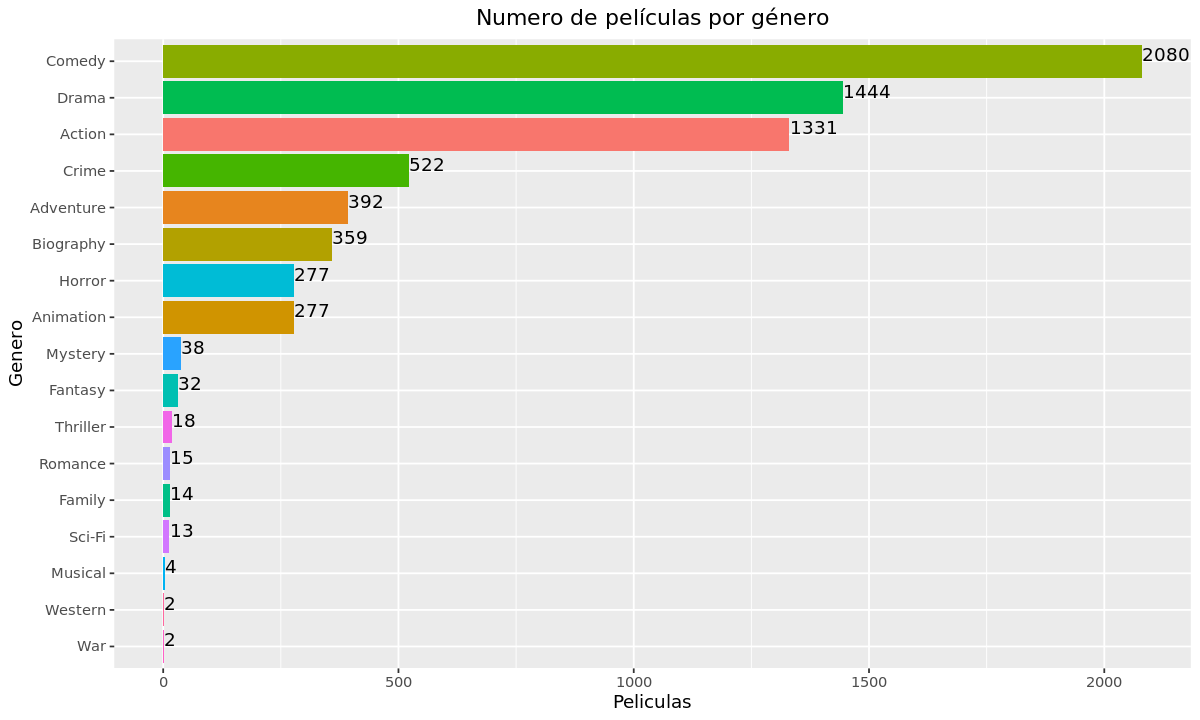

In [46]:
options(repr.plot.width=10, repr.plot.height=6)

table(movies$genre)  %>%  as.data.frame() %>% arrange(Freq)  %>% 
  ggplot(aes(x=reorder(Var1,Freq), y=Freq , fill=as.factor(Var1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Numero de películas por género")+
        coord_flip() +
        geom_text(aes( label=Freq, hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

Si quisieramos concentrarnos en las categorías con los mayores números de películas, podemos agrupar el resto para mirar de una mejor manera la distribución: 

In [40]:
t1 <-movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)  %>% 
    mutate ( genre1= if_else(peliculas<50, "Otros", as.character(genre)))  %>%
    group_by( genre1)  %>% summarise(peliculas1=sum(peliculas) ) %>% as_tibble() %>%
    mutate(porcentaje= round(peliculas1/sum(peliculas1),2) )
t1

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



genre1,peliculas1,porcentaje
<chr>,<int>,<dbl>
Action,1331,0.20
Adventure,392,0.06
Animation,277,0.04
Biography,359,0.05
Comedy,2080,0.30
Crime,522,0.08
Drama,1444,0.21
Horror,277,0.04
Otros,138,0.02


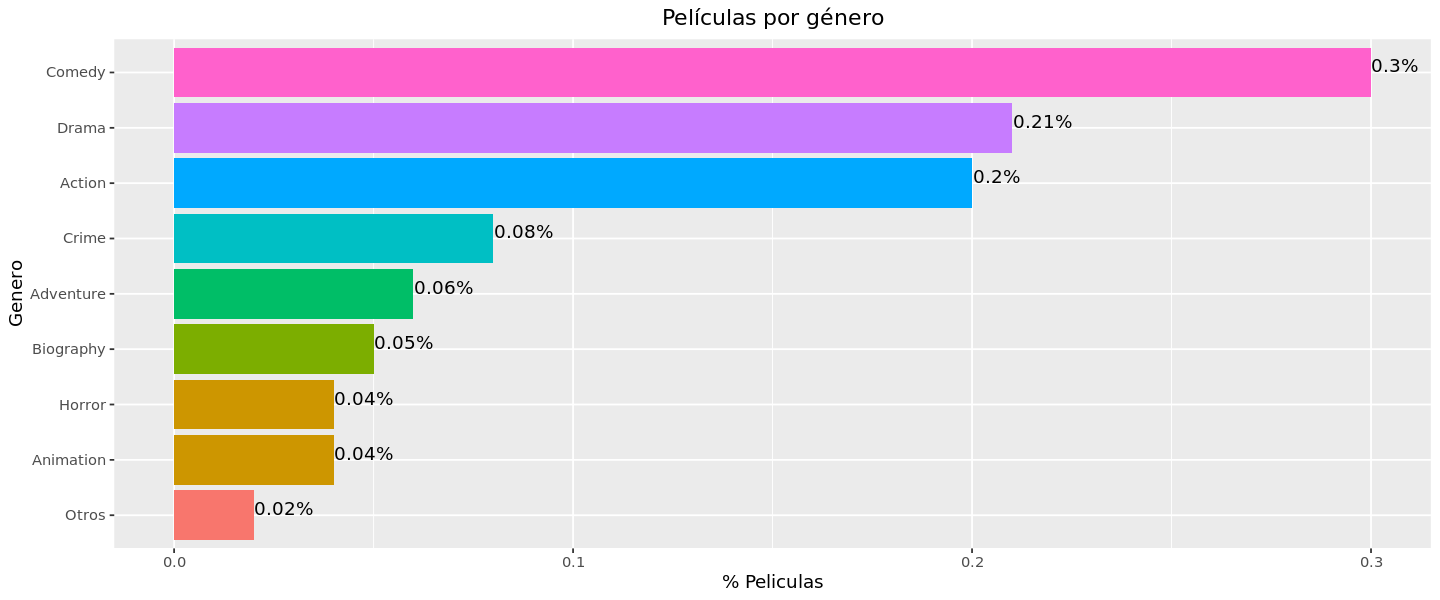

In [44]:
options(repr.plot.width=12, repr.plot.height=5)
t1  %>%  
    ggplot(aes(x=reorder(genre1,porcentaje), y=porcentaje , fill=as.factor(peliculas1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Películas por género")+
        coord_flip() +
        geom_text(aes( label=paste0(porcentaje, "%"), hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("% Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

Responderemos a las siguientes preguntas: 

**¿Cómo se ven las medidas de tendencia central por género?**

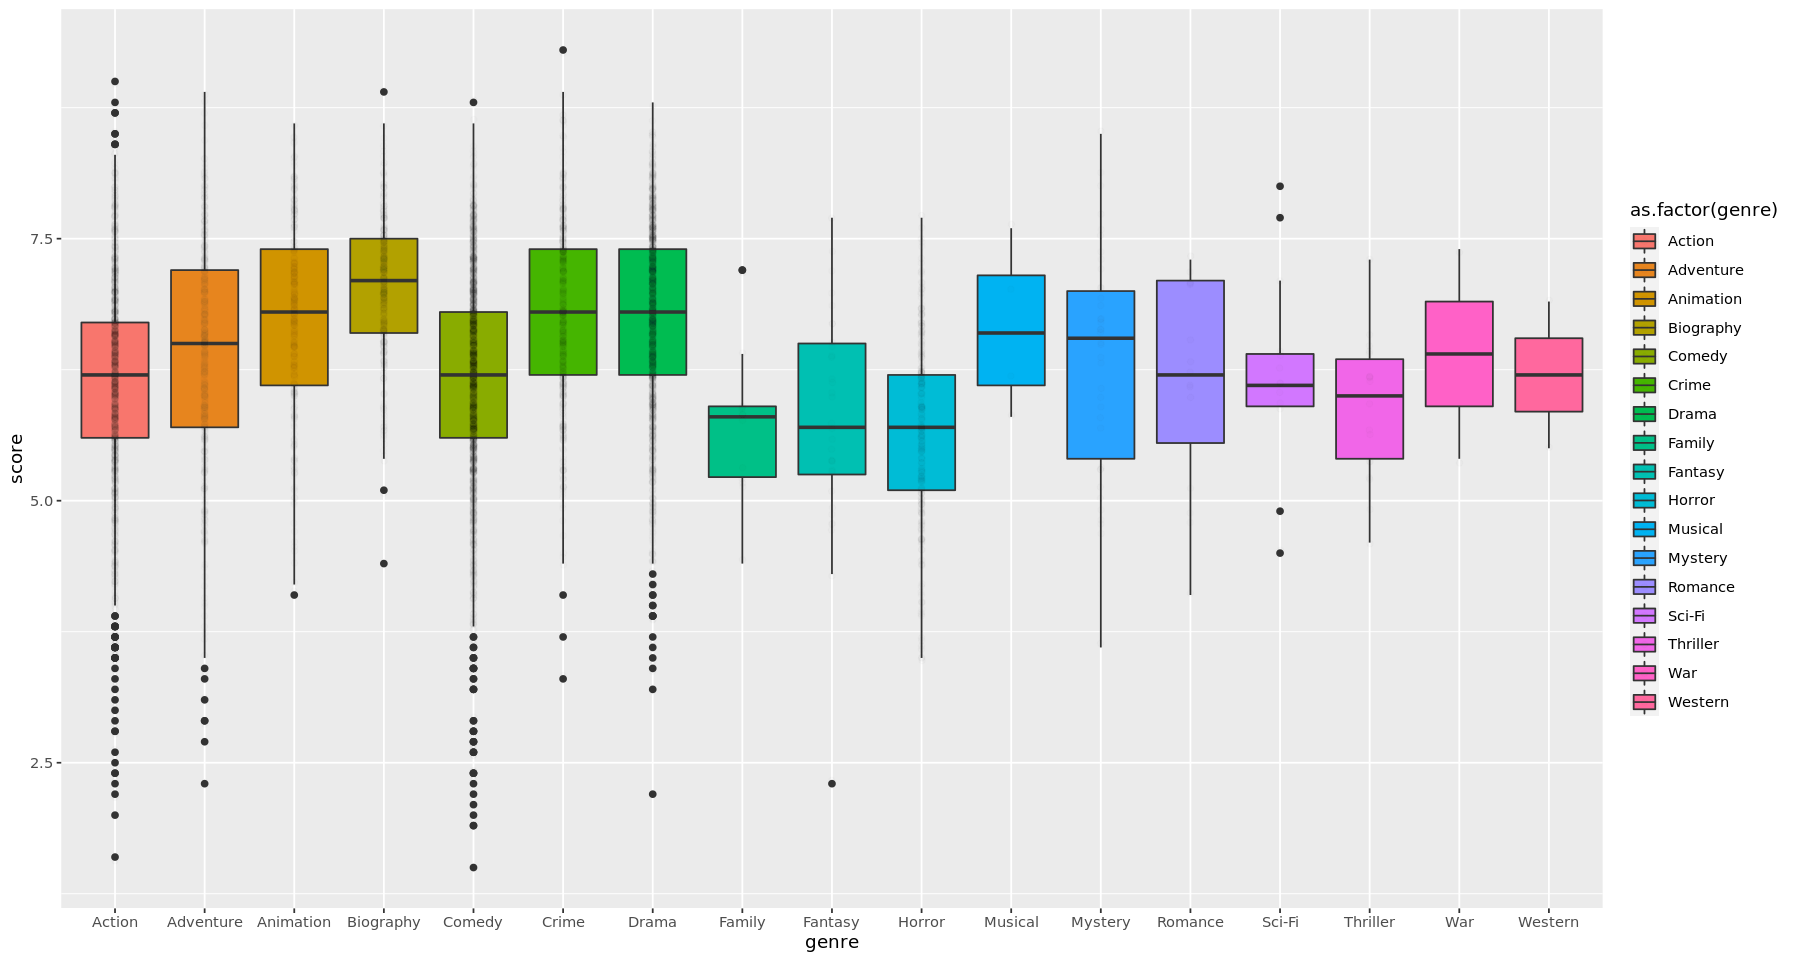

In [33]:
options(repr.plot.width=15, repr.plot.height=8)
# La distribucion de las calificaciones a las peliculas genero? 
movies %>% 
  ggplot(aes(genre,score, fill=as.factor(genre)) )  +
        geom_boxplot() +
        geom_jitter(width=0.005,alpha=0.01)
        

**Intepretación**

* Podemos decir a nuestro cliente que los géneros que tienen un promedio las mejores calificaciones (score) son los generos de peliculas Biograficas, seguidas de la de Animación. 
* La distribución de los géneros de Acción y Comedia, son los que tienen colas mas pesadas. 
* Los géneros con mayor varianza son Aventura, Misterio y Romance.

**¿Cómo es la relación entre la duración y la calificación de las peliculas?**

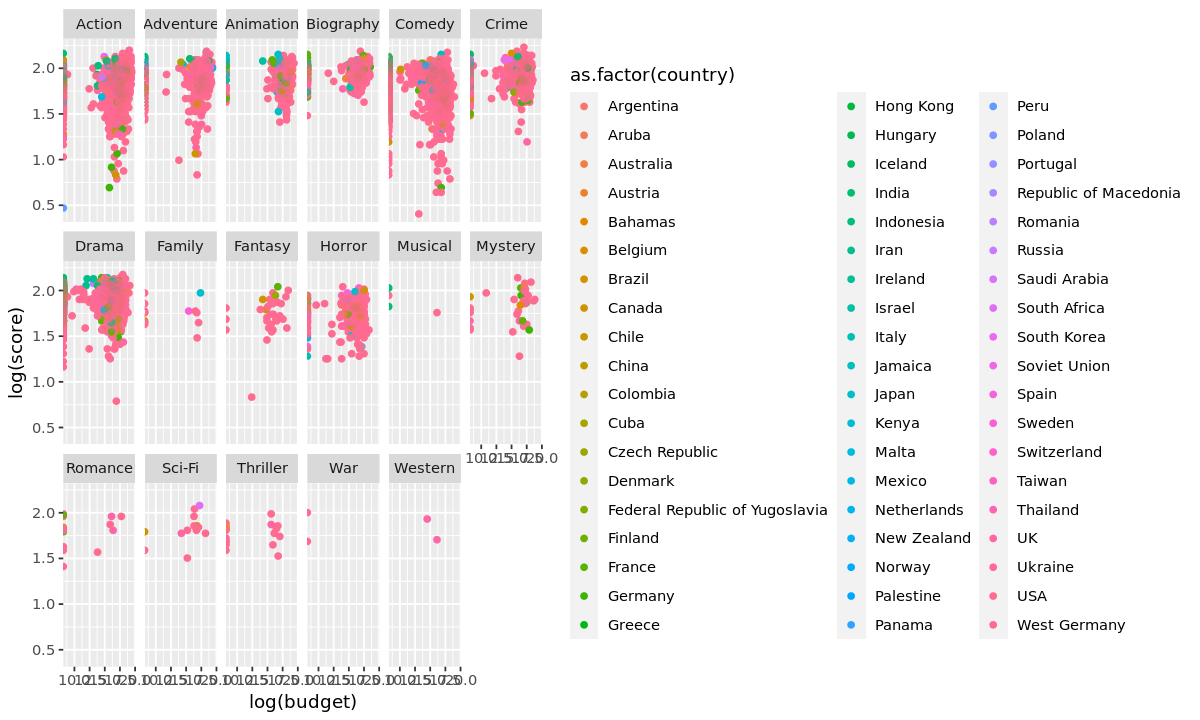

In [48]:
movies %>% 
  ggplot(aes(log(runtime),log(score), color=as.factor(country )   ) )  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=3) +
        


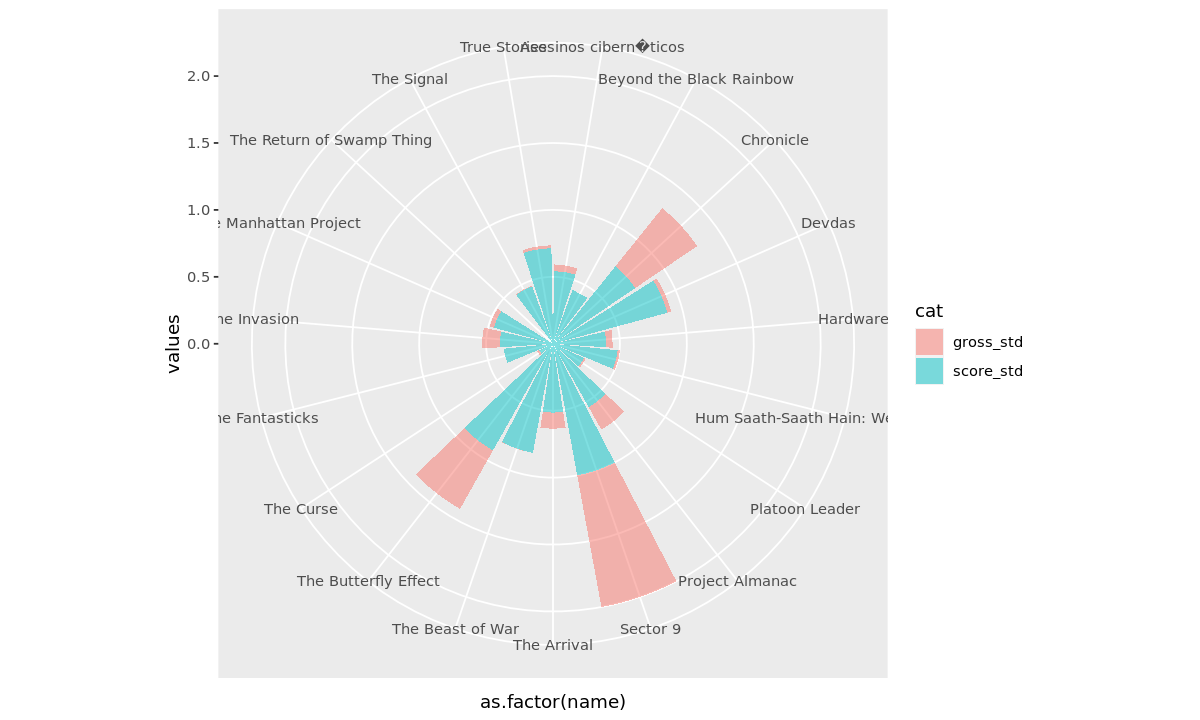

In [50]:
movies  %>% select(genre, gross, name, score)  %>% 
    #filter(genre %in% c("Adventure","Crime","Action","Drama","Comedy"))  %>%
    filter(genre %in% c("War","Musical","Sci-Fi"))  %>% 
    mutate(score_std= normalit(score), gross_std = normalit(gross)) %>% 
    select(genre,name,  score_std, gross_std)  %>% 
    gather(key = "cat", value="values", -c(1,2))  %>% arrange(name)  %>% 
 
 ggplot() +      
  
# # #   # Add the stacked bar
     geom_bar(aes(x=as.factor(name), y=values, fill=cat), stat="identity", alpha=0.5) +
     #scale_fill_viridis(discrete=TRUE) +

#   ylim(-150,max(label_data$tot, na.rm=T)) +
#   theme_minimal() +
#   theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.title = element_blank(),
#     panel.grid = element_blank(),
#     plot.margin = unit(rep(-1,4), "cm") 
#   ) +
  coord_polar() 
